## 4.10 Coding Etiquette: Part I  Answers 5-9

In [3]:
# Import librairies
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Import dataframe
normal_activity_cust = pd.read_pickle(r'/Users/emilyseitz/Desktop/emilyseitz/Instacart Basket Analysis /Data/Prepared Data/normal_activity_cust.pkl')

In [5]:
path = r'/Users/emilyseitz/Desktop/emilyseitz/Instacart Basket Analysis '

In [4]:
path

'/Users/emilyseitz/Desktop/emilyseitz/Instacart Basket Analysis '

## 5. Customer Profiling- based on demographics and product preferences

In [6]:
# view age of customers
normal_activity_cust['Age'].value_counts(dropna = False).sort_index()

18    478832
19    496633
20    480628
21    489549
22    491342
       ...  
77    478489
78    471482
79    508845
80    493147
81    486268
Name: Age, Length: 64, dtype: int64

In [6]:
# Create age groups column and flags
normal_activity_cust.loc[normal_activity_cust['Age'] <= 24, 'Age_Group'] = '18-24'
normal_activity_cust.loc[(normal_activity_cust['Age'] > 24) & (normal_activity_cust['Age'] <= 34), 'Age_Group'] = '25-34'
normal_activity_cust.loc[(normal_activity_cust['Age'] > 34) & (normal_activity_cust['Age'] <= 44), 'Age_Group'] = '35-44'
normal_activity_cust.loc[(normal_activity_cust['Age'] > 44) & (normal_activity_cust['Age'] <= 54), 'Age_Group'] = '45-54'
normal_activity_cust.loc[(normal_activity_cust['Age'] > 54) & (normal_activity_cust['Age'] <= 64), 'Age_Group'] = '55-64'
normal_activity_cust.loc[(normal_activity_cust['Age'] > 64) & (normal_activity_cust['Age'] <= 74), 'Age_Group'] = '65-74' 
normal_activity_cust.loc[normal_activity_cust['Age'] >74, 'Age_Group'] = '74-82'

In [18]:
# summarize age group buckets
normal_activity_cust['Age_Group'].value_counts (dropna = False).sort_index()

18-24 yrs    3418316
25-34 yrs    4831481
35-44 yrs    4840870
45-54 yrs    4892089
55-64 yrs    4807162
65-74 yrs    4787011
74-82 yrs    3415735
Name: Age_Group, dtype: int64

In [9]:
# check total age buckets = all entries in df
normal_activity_cust.shape

(30992664, 36)

In [52]:
# check income by sex
normal_activity_cust.groupby('Gender').agg({'income': ['mean', 'min', 'max']})


income               
                mean    min     max
Gender                             
Female  99994.858095  25911  591089
Male    99355.884510  25903  593901

In [7]:
# create income range column and income aggregates
normal_activity_cust.loc[(normal_activity_cust['income'] > 25000) & (normal_activity_cust['income'] <= 50000), 'Income_range'] = '25-50k'
normal_activity_cust.loc[(normal_activity_cust['income'] > 50000) & (normal_activity_cust['income'] <= 75000), 'Income_range'] = '51-75k'
normal_activity_cust.loc[(normal_activity_cust['income'] > 75000) & (normal_activity_cust['income'] <= 100000), 'Income_range'] = '76-100k'
normal_activity_cust.loc[(normal_activity_cust['income'] > 100000) & (normal_activity_cust['income'] <= 150000), 'Income_range'] = '101-150k'
normal_activity_cust.loc[(normal_activity_cust['income'] > 150000) & (normal_activity_cust['income'] <= 250000), 'Income_range'] = '151-250k'
normal_activity_cust.loc[(normal_activity_cust['income'] > 250000) & (normal_activity_cust['income'] <= 400000), 'Income_range'] = '251-400k'
normal_activity_cust.loc[(normal_activity_cust['income'] > 400000) & (normal_activity_cust['income'] <= 600000), 'Income_range'] = '401-600k'

In [18]:
normal_activity_cust['Income_range'].value_counts (dropna = False).sort_index()

101-150k    10321136
151-250k     3718058
25-50k       3366149
251-400k      132852
401-600k       46998
51-75k       6550189
76-100k      6857282
Name: Income_range, dtype: int64

In [8]:
# Creating flag for household- marriage & kids

normal_activity_cust.loc[(normal_activity_cust['fam_status'].isin(['single','divorced/widowed','living with parents and siblings'])) & (normal_activity_cust['n_dependants'] ==0), 'household_profile'] = 'Single adult'
normal_activity_cust.loc[(normal_activity_cust['fam_status'].isin(['single','divorced/widowed','living with parents and siblings'])) & (normal_activity_cust['n_dependants'] >0), 'household_profile'] = 'Single parent'
normal_activity_cust.loc[(normal_activity_cust['fam_status'] == 'married') & (normal_activity_cust['n_dependants'] <=1), 'household_profile'] = 'Family-single child'
normal_activity_cust.loc[(normal_activity_cust['fam_status'] == 'married') & (normal_activity_cust['n_dependants'] >=2), 'household_profile'] = 'Family-multiple kids'


In [11]:
normal_activity_cust['household_profile'].value_counts (dropna = False).sort_index()

Family-multiple kids    14545479
Family-single child      7217542
Single adult             7747032
Single parent            1482611
Name: household_profile, dtype: int64

In [37]:
# view make up of family status
normal_activity_cust['fam_status'].value_counts(dropna = False).sort_index()

divorced/widowed                     2647761
living with parents and siblings     1482611
married                             21763021
single                               5099271
Name: fam_status, dtype: int64

In [38]:
# view responses of dependants
normal_activity_cust['n_dependants'].value_counts(dropna = False).sort_index()

0    7747032
1    7725981
2    7740199
3    7779452
Name: n_dependants, dtype: int64

In [9]:
# Importing department info

df_dept =pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [11]:
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [10]:
# Rename column.
df_dept = df_dept.rename(columns = {'Unnamed: 0' : 'department_id'})

In [57]:
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [10]:
plt.savefig('dept_names.png')

<Figure size 640x480 with 0 Axes>

In [13]:
# verify new columns added
normal_activity_cust.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,Age,date_joined,n_dependants,fam_status,income,region,Customer Activity,Age_Group,Income_range,household_profile
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,31,2/17/2019,3,married,40423,South,Normal Activity,25-34 yrs,25-50k,Family-multiple kids
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,31,2/17/2019,3,married,40423,South,Normal Activity,25-34 yrs,25-50k,Family-multiple kids
2,473747,1,prior,3,3,12,21.0,196,1,1,...,31,2/17/2019,3,married,40423,South,Normal Activity,25-34 yrs,25-50k,Family-multiple kids
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,31,2/17/2019,3,married,40423,South,Normal Activity,25-34 yrs,25-50k,Family-multiple kids
4,431534,1,prior,5,4,15,28.0,196,1,1,...,31,2/17/2019,3,married,40423,South,Normal Activity,25-34 yrs,25-50k,Family-multiple kids


In [23]:
# view all columns
normal_activity_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30992664 entries, 0 to 32434207
Data columns (total 37 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   eval_set                object  
 3   order_number            int64   
 4   order_dow               int64   
 5   order_hour_of_day       int64   
 6   days_since_prior_order  float64 
 7   product_id              int64   
 8   add_to_cart_order       int64   
 9   reordered               int64   
 10  _merge                  category
 11  Unnamed: 0              int64   
 12  product_name            object  
 13  aisle_id                int64   
 14  department_id           int64   
 15  prices                  float64 
 16  price_range_loc         object  
 17  busiest_day             object  
 18  busiest_days            object  
 19  busiest_period_of_days  object  
 20  max_order               int64   
 21  loyalt

In [11]:
# Merging the dept df with normal activity customers df
normal_cust_merged = normal_activity_cust.merge(df_dept, on = 'department_id')

In [16]:
#confirm dept_id added
normal_cust_merged[['user_id', 'department_id', 'department']].head(10)

,user_id,department_id,department
0,1,7,beverages
1,1,7,beverages
2,1,7,beverages
3,1,7,beverages
4,1,7,beverages
5,1,7,beverages
6,1,7,beverages
7,1,7,beverages
8,1,7,beverages
9,1,7,beverages


In [36]:
# View new household profiles
normal_cust_merged[['fam_status', 'n_dependants', 'household_profile']].head(50)

,fam_status,n_dependants,household_profile
0,married,3,Family-multiple kids
1,married,3,Family-multiple kids
2,married,3,Family-multiple kids
3,married,3,Family-multiple kids
4,married,3,Family-multiple kids
5,married,3,Family-multiple kids
6,married,3,Family-multiple kids
7,married,3,Family-multiple kids
8,married,3,Family-multiple kids
9,married,3,Family-multiple kids


## 6. Vizualizations of profiles

Text(0.5, 1.0, 'Instacart Customers by Income Groups')

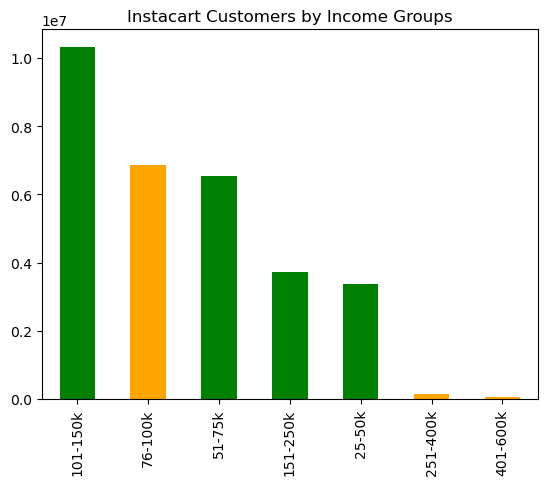

In [14]:
# Create bar chart for Income_range of customers
bar = normal_activity_cust['Income_range'].sort_index().value_counts().plot.bar(color =['green','orange','green', 'green','green', 'orange', 'orange'])
plt.title('Instacart Customers by Income Groups')

In [15]:
# Export bar graph
bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_Cust_by_Income_Grp.png'))

In [12]:
# Create a List holding True/False values to the test np.random.rant () <= 0.7
dev = np.random. rand(len(normal_cust_merged)) <= 0.7

In [13]:
# Store 70% of the sample in the dataframe big
big = normal_activity_cust[dev]

In [14]:
# Store 30% of the sample in the dataframe small
small = normal_activity_cust[~dev]

In [23]:
len(normal_activity_cust)

30992664

In [24]:
len(big) + len(small)

30992664

In [25]:
df_3 = small[['avg_price_all_orders','Income_range']]

Text(0.5, 1.0, 'Avg Price of Orders by Income Range')

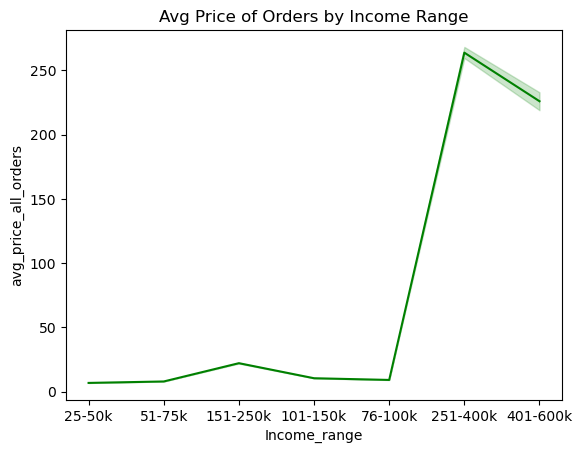

In [28]:
# Create line graph with format & title
line_3 = sns.lineplot(data = df_3, x = 'Income_range',y = 'avg_price_all_orders', color = 'green')
plt.title('Avg Price of Orders by Income Range')


In [30]:
# Export line graph
line_3.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_AUR_Income_Range.png'))

Text(0.5, 1.0, 'Instacart Customers by Age Group')

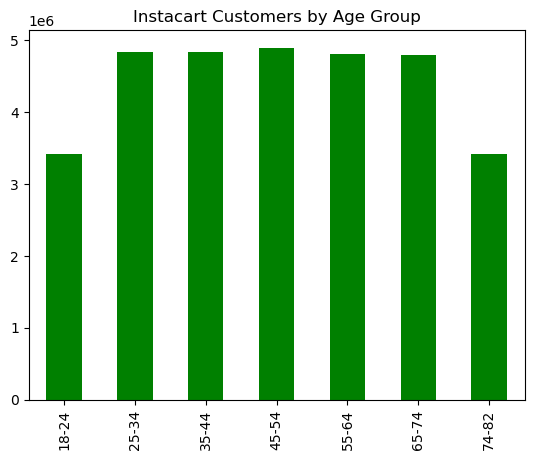

In [40]:
# Create a bar chart
bar_2 = normal_activity_cust['Age_Group'].value_counts ().sort_index().plot.bar (color =['green'])
plt.title('Instacart Customers by Age Group')

In [41]:
# Export bar graph
bar_2.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_Cust_Age_Grp.png'))

In [18]:
# select ony necessary columns for chart
df_4 = small[['price_range_loc','Age_Group']]

Text(0.5, 1.0, 'Price Range Purchased by Age Group')

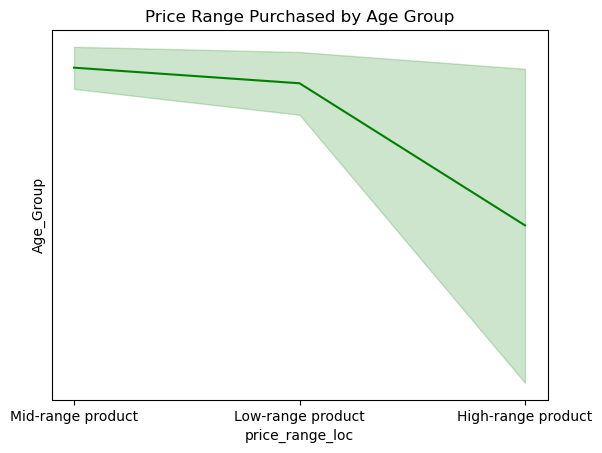

In [19]:
# Create line graph with format & title
line_4 = sns.lineplot(data = df_4, x = 'price_range_loc',y = 'Age_Group', color = 'green')
plt.title('Price Range Purchased by Age Group')


In [20]:
# Export line graph
line_4.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_AUR_Ageby__Group.png'))

In [38]:
normal_activity_cust['fam_status'].value_counts (dropna = False).sort_index()

divorced/widowed                     2647761
living with parents and siblings     1482611
married                             21763021
single                               5099271
Name: fam_status, dtype: int64

In [39]:
# select ony necessary columns for chart
df_5 = small[['avg_price_all_orders','fam_status']]

Text(0.5, 1.0, 'Avg Price of Orders by Marital Status')

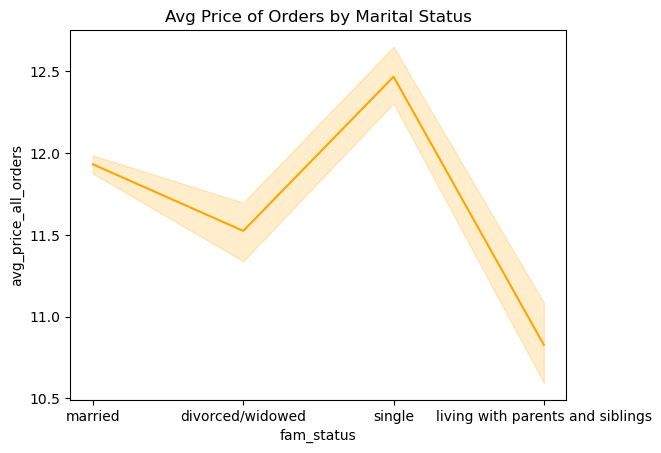

In [41]:
# Create line graph with format & title
line = sns.lineplot(data = df_5, x = 'fam_status',y = 'avg_price_all_orders', color = 'orange')
plt.title('Avg Price of Orders by Marital Status')


In [42]:
# Export line graph
line.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Avg_price_by_marital_stat.png'))

Text(0.5, 1.0, 'Instacart Customers by Marital Status')

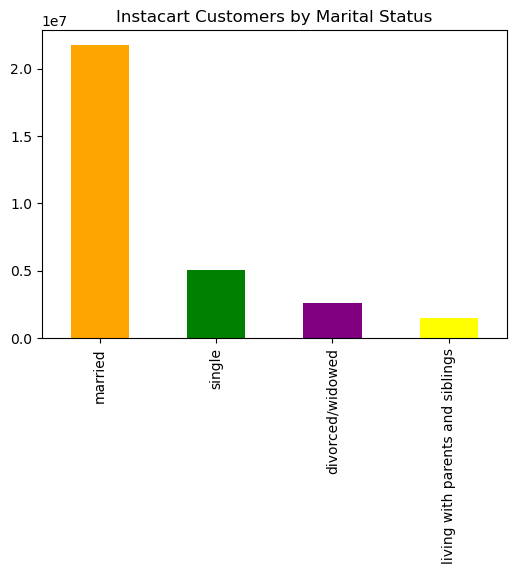

In [88]:
# Create a bar chart
plt.figure(figsize=(6, 4))
bar_3 = normal_activity_cust['fam_status'].sort_index().value_counts().plot.bar (color =['orange','green','purple','yellow'])
plt.title('Instacart Customers by Marital Status')


In [44]:
# Export bar graph
bar_3.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_Cust_by_marital.png'))

In [47]:
# select ony necessary columns for chart
df_6 = small[['avg_price_all_orders','region']]

Text(0.5, 1.0, 'Avg Price of Orders by Region')

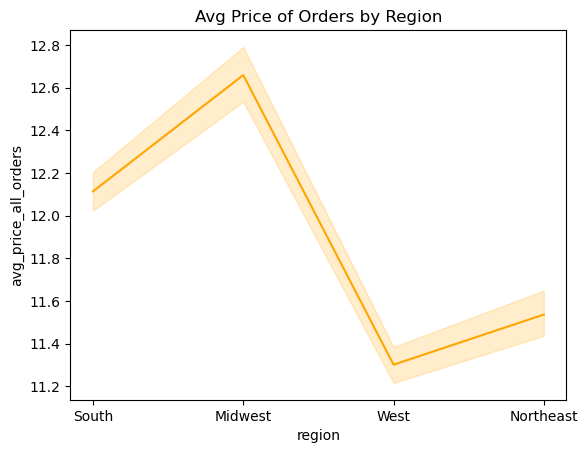

In [48]:
# Create line graph with format & title
line = sns.lineplot(data = df_6, x = 'region',y = 'avg_price_all_orders', color = 'orange')
plt.title('Avg Price of Orders by Region')


In [49]:
# Export line graph
line.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Avg_price_by_Region.png'))

In [20]:
# select ony necessary columns for chart
df_7 = small[['avg_price_all_orders','n_dependants']]


([<matplotlib.axis.XTick at 0x1548cac90>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

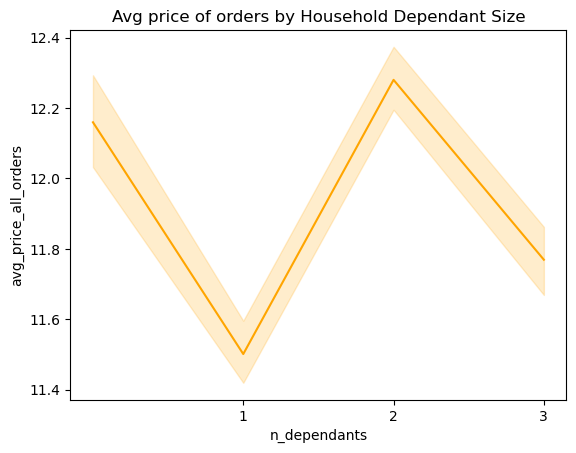

In [21]:
# Create line graph with format & title
line_23 = sns.lineplot(data = df_7, x = 'n_dependants',y = 'avg_price_all_orders', color = 'orange')
plt.title('Avg price of orders by Household Dependant Size')
plt.xticks([1,2,3])

In [22]:
# Export line graph
line_23.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Avg_price_hh_dependants_2.png'))

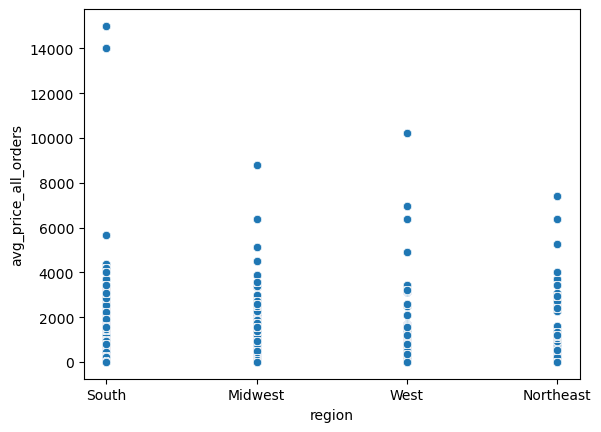

In [32]:
scatterplot_1 = sns.scatterplot(x = 'region', y = 'avg_price_all_orders',data = normal_activity_cust)

In [33]:
# Export scatterplot graph
scatterplot_1.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'scatter_region_avg_price.png'))

In [56]:
# select ony necessary columns for chart
df_8 = small[['order_hour_of_day','region']]

Text(0.5, 1.0, 'Orders by avg hour of day by Region')

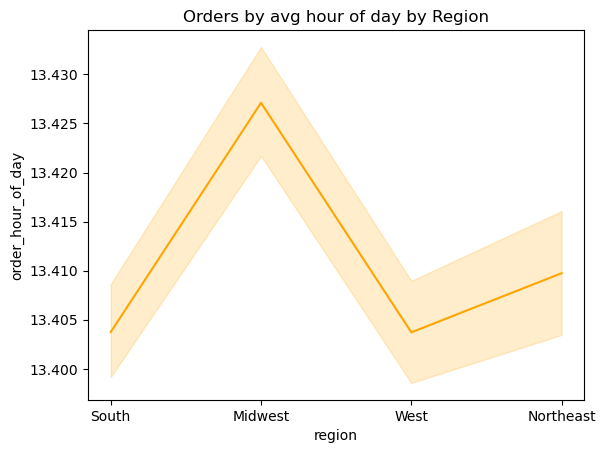

In [60]:
# Create line graph with format & title
line = sns.lineplot(data = df_8, x = 'region',y = 'order_hour_of_day', color = 'orange')
plt.title('Orders by avg hour of day by Region')


In [13]:
# select ony necessary columns for chart
df_8 = small[['avg_price_all_orders','department_id']]

([<matplotlib.axis.XTick at 0x15b1ab5d0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21')])

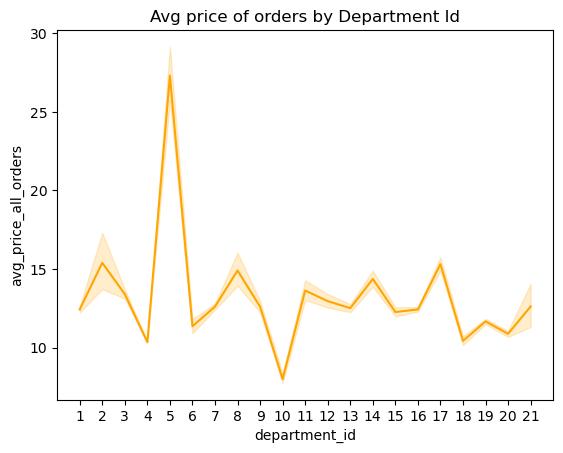

In [19]:
# Create line graph with format & title
line = sns.lineplot(data = df_8, x = 'department_id',y = 'avg_price_all_orders', color = 'orange')
plt.title('Avg price of orders by Department Id')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])

In [20]:
# Export line graph
line.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_avg_price_by_dept.png'))

In [16]:
normal_activity_cust['department_id'].value_counts (dropna = False).sort_index()

1     2123342
2       34411
3     1125026
4     9079276
5      144674
6      255991
7     2571934
8       93065
9      822136
10      33451
11     424415
12     674785
13    1782903
14     678095
15    1012074
16    5191828
17     699858
18     410392
19    2766406
20    1003834
21      64768
Name: department_id, dtype: int64

Text(0.5, 1.0, 'Order volume by Day of Week')

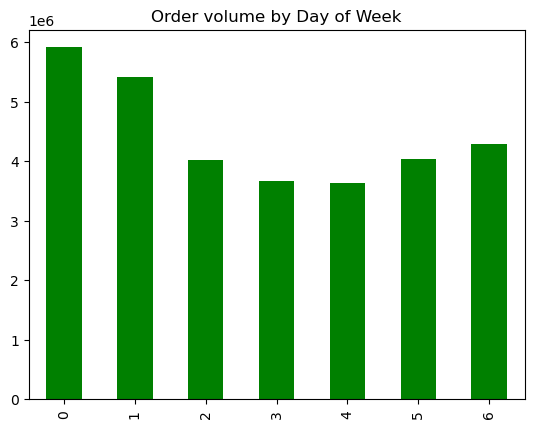

In [27]:
# Create a bar chart
bar_4 = normal_activity_cust['order_dow'].value_counts().sort_index().plot.bar (color =['green'])
plt.title('Order volume by Day of Week')


In [28]:
# Export bar graph
bar_4.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_order_dow.png'))

In [15]:
normal_activity_cust['order_dow'].value_counts (dropna = False).sort_index()

0    5913818
1    5417038
2    4028461
3    3672927
4    3628257
5    4037263
6    4294900
Name: order_dow, dtype: int64

Text(0.5, 1.0, 'Orders by Department')

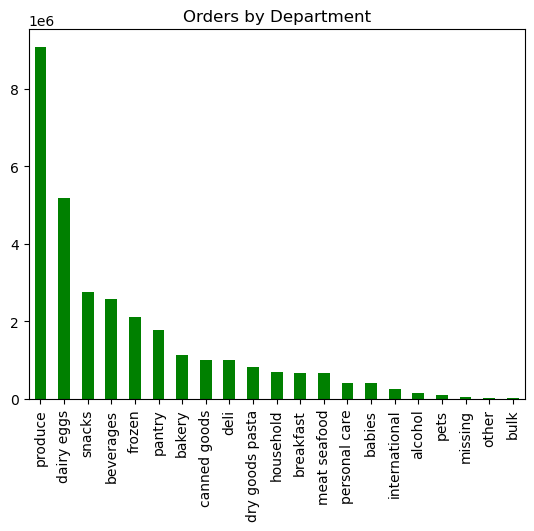

In [41]:
# Create a bar chart
bar_6 = normal_cust_merged['department'].sort_index().value_counts().plot.bar (color =['green'])
plt.title('Orders by Department')


In [39]:
# Export bar graph
bar_6.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_by_department_id.png'))

In [28]:
# check avg-price-all-orders by dept
normal_activity_cust.groupby('department_id').agg({'avg_price_all_orders': ['mean', 'min', 'max']})

avg_price_all_orders                        
                              mean       min           max
department_id                                             
1                        12.456739  1.845455  15006.940000
2                        14.115697  1.522222   3695.987705
3                        13.362819  1.900000  15006.940000
4                        10.357153  1.300000  14042.512281
5                        27.723004  2.046154  14042.512281
6                        11.492904  2.400000   5271.136842
7                        12.685800  1.100000  15006.940000
8                        15.268211  3.557143   6390.138298
9                        12.593893  2.611111  14042.512281
10                        8.446000  3.112500   2496.148259
11                       13.484653  2.222222  15006.940000
12                       13.059469  3.278571  15006.940000
13                       12.517495  1.360000  15006.940000
14                       14.642343  2.172727  10209.987755
15                       12.251780  1.800000  15006.940000
16                       12.362999  1.568750  15006.940000
17                       15.032260  1.000000  15006.940000
18                       10.200880  1.425000   4357.073913
19                       11.672137  1.262500  15006.940000
20                       11.067172  1.773333   6983.593023
21                       11.814954  3.600000   6390.138298

In [34]:
# check avg-price-all-orders by Age Group
normal_activity_cust.groupby('Age_Group').agg({'avg_price_all_orders': ['mean', 'min', 'max']})

avg_price_all_orders                        
                          mean       min           max
Age_Group                                             
18-24 yrs            12.445120  2.000000  10209.987755
25-34 yrs            11.915164  1.628571   5271.136842
35-44 yrs            11.533309  1.000000   6983.593023
45-54 yrs            11.943683  1.000000  15006.940000
55-64 yrs            12.284958  1.500000   6390.138298
65-74 yrs            11.392757  1.262500   7414.485185
74-82 yrs            12.272143  1.933333  14042.512281

## 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [34]:
# create aggregate view by Age Group based on frequency- "days since last order" and avg price
age_group_agg = normal_cust_merged.groupby('Age_Group',)[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [33]:
age_group_agg

days_since_prior_order                  prices                    
                             min   max       mean    min      max       mean
Age_Group                                                                   
18-24 yrs                    0.0  30.0  10.762751    1.0  99999.0  12.445120
25-34 yrs                    0.0  30.0  10.866472    1.0  99999.0  11.915164
35-44 yrs                    0.0  30.0  10.788209    1.0  99999.0  11.533309
45-54 yrs                    0.0  30.0  10.803096    1.0  99999.0  11.943683
55-64 yrs                    0.0  30.0  10.848781    1.0  99999.0  12.284958
65-74 yrs                    0.0  30.0  10.784867    1.0  99999.0  11.392757
74-82 yrs                    0.0  30.0  10.802438    1.0  99999.0  12.272143

In [36]:
# create aggregate view by Income Range based on frequency- "days since last order" and avg price
Income_group_agg = normal_cust_merged.groupby('Income_range',)[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [37]:
Income_group_agg 

days_since_prior_order                  prices           \
                                min   max       mean    min      max   
Income_range                                                           
101-150k                        0.0  30.0  10.802369    1.0  99999.0   
151-250k                        0.0  30.0  10.710026    1.0  99999.0   
25-50k                          0.0  30.0  11.175710    1.0     25.0   
251-400k                        0.0  30.0  10.102742    1.0  99999.0   
401-600k                        0.0  30.0  10.308470    1.0  99999.0   
51-75k                          0.0  30.0  10.760621    1.0  14900.0   
76-100k                         0.0  30.0  10.763366    1.0  99999.0   

                          
                    mean  
Income_range              
101-150k       10.361797  
151-250k       22.038505  
25-50k          6.713149  
251-400k      260.923467  
401-600k      222.983835  
51-75k          7.838184  
76-100k         9.028721

In [38]:
# create aggregate view by Region based on frequency- "days since last order" and avg price
Region_group_agg = normal_cust_merged.groupby('region',)[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [39]:
Region_group_agg

days_since_prior_order                  prices                    
                             min   max       mean    min      max       mean
region                                                                      
Midwest                      0.0  30.0  10.892919    1.0  99999.0  12.682131
Northeast                    0.0  30.0  10.774511    1.0  99999.0  11.544005
South                        0.0  30.0  10.814373    1.0  99999.0  12.119611
West                         0.0  30.0  10.754448    1.0  99999.0  11.278066

In [40]:
# create aggregate view by Household Profile based on frequency- "days since last order" and avg price
household_group_agg = normal_cust_merged.groupby('household_profile',)[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [41]:
household_group_agg

days_since_prior_order                  prices           \
                                        min   max       mean    min      max   
household_profile                                                              
Family-multiple kids                    0.0  30.0  10.824297    1.0  99999.0   
Family-single child                     0.0  30.0  10.814663    1.0  99999.0   
Single adult                            0.0  30.0  10.791750    1.0  99999.0   
Single parent                           0.0  30.0  10.750739    1.0  99999.0   

                                 
                           mean  
household_profile                
Family-multiple kids  12.102900  
Family-single child   11.627748  
Single adult          12.103485  
Single parent         10.892382

In [43]:
# create aggregate view by Household Profile & Dept based on frequency- "days since last order" and avg price
department_household_profile_agg = normal_cust_merged.groupby(['household_profile', 'department'])[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [46]:
department_household_profile_agg

days_since_prior_order                   \
                                                      min   max       mean   
household_profile    department                                              
Family-multiple kids alcohol                          0.0  30.0  10.096676   
                     babies                           0.0  30.0   9.685108   
                     bakery                           0.0  30.0  10.790562   
                     beverages                        0.0  30.0  10.772529   
                     breakfast                        0.0  30.0  11.061952   
...                                                   ...   ...        ...   
Single parent        pantry                           0.0  30.0  10.576977   
                     personal care                    0.0  30.0  11.315281   
                     pets                             0.0  30.0  11.389847   
                     produce                          0.0  30.0  10.569925   
                     snacks                           0.0  30.0  10.611435   

                                   prices                  
                                      min   max      mean  
household_profile    department                            
Family-multiple kids alcohol          1.0  15.0  8.198025  
                     babies           1.0  15.0  7.660396  
                     bakery           1.0  15.0  7.870049  
                     beverages        1.0  15.0  7.679981  
                     breakfast        1.0  14.9  8.051157  
...                                   ...   ...       ...  
Single parent        pantry           1.0  20.0  8.017662  
                     personal care    1.0  15.0  7.938779  
                     pets             1.0  15.0  7.918097  
                     produce          1.0  15.0  8.003058  
                     snacks           1.6   7.0  4.265732  

[84 rows x 6 columns]

## 8. Compare customer profiles with regions and departments.

In [48]:
# Checking the relationship of Age Groups & 'income_ranges' of profiles by region.
profile_age_income_region = normal_cust_merged.groupby('region')[['Income_range','Age_Group']].value_counts().reset_index(name='count')

In [49]:
profile_age_income_region

,region,Income_range,Age_Group,count
0,Midwest,101-150k,45-54 yrs,598179
1,Midwest,101-150k,55-64 yrs,587543
2,Midwest,101-150k,65-74 yrs,572379
3,Midwest,51-75k,25-34 yrs,507602
4,Midwest,101-150k,74-82 yrs,414848
...,...,...,...,...
183,West,401-600k,74-82 yrs,2727
184,West,251-400k,18-24 yrs,1823
185,West,401-600k,55-64 yrs,1796
186,West,401-600k,35-44 yrs,1343


In [19]:
# Checking income_groupsa by regions.
Region_Income = pd.crosstab(normal_cust_merged['Income_range'],normal_cust_merged['region'], dropna = False)

In [51]:
Region_Income

region,Midwest,Northeast,South,West
Income_range,,,,
101-150k,2485031,1840596,3375935,2619574
151-250k,869167,649590,1230769,968532
25-50k,784517,587850,1143857,849925
251-400k,32198,22041,48465,30148
401-600k,16388,6679,12237,11694
51-75k,1518136,1143831,2173188,1715034
76-100k,1562270,1219481,2336011,1739520


## 9. Charts based on merged profiles

Text(0.5, 0, 'Income Group')

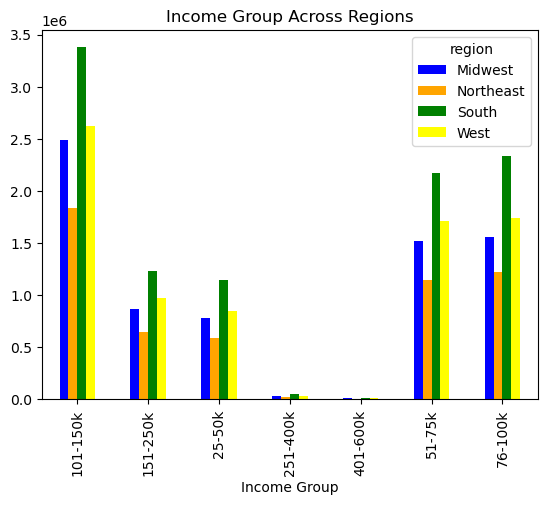

In [21]:
# Visualtization of 'income_class' and 'region'
bar_Region_Income = Region_Income.plot.bar(title = 'Income Group Across Regions', color= ['blue','orange','green','yellow'])
plt.xlabel("Income Group")


In [22]:
# Export bar chart
bar_Region_Income.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_region_income.png'))

In [47]:
# Piovt the data to create a stacked bar chart to see relationship between 'departments' and 'household_profile'
customer_hh_dept = normal_cust_merged.groupby(['department_id', 'household_profile']).size().unstack(fill_value=0)

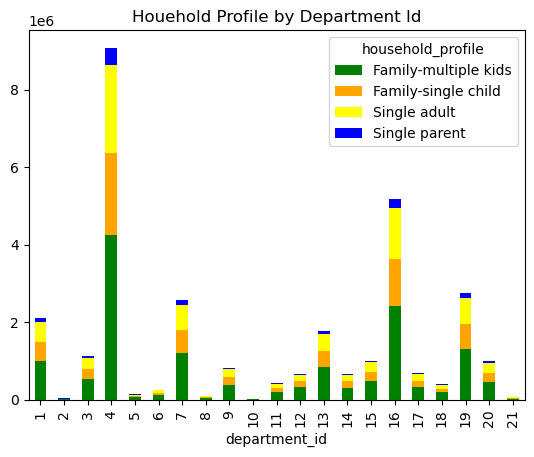

In [48]:
#stacked bar graph
stacked_hh_dept = customer_hh_dept.plot.bar(stacked = True, title = 'Houehold Profile by Department Id', color = ['green','orange','yellow','blue'])

In [49]:
# Export stacked bar chart
stacked_hh_dept.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'stacked_hh_dept_id.png'))

In [90]:
# Create a crosstab to count age in each department
cross_tab_Age_Group = pd.crosstab(normal_cust_merged['department'], normal_cust_merged['Age_Group'])

Text(0, 0.5, 'Count')

<Figure size 1000x2000 with 0 Axes>

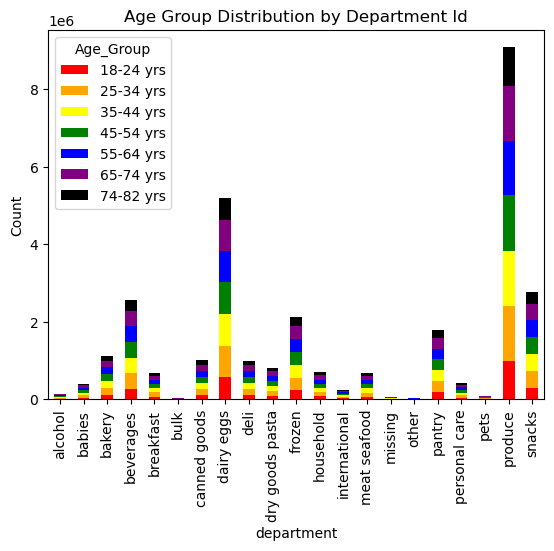

In [91]:
# Creating a clustered bar chart
plt.figure(figsize= (10, 20))
clustered_cross_tab_Age_Group = cross_tab_Age_Group.plot(kind='bar', stacked=True, title='Age Group Distribution by Department Id', color = ['red', 'orange','yellow','green','blue','purple','black'])
plt.xlabel('department')
plt.ylabel('Count')


In [69]:
# Exporting clustered bar chart
clustered_cross_tab_Age_Group.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'clustered_cross_tab_Age_Group_dept.png',))

In [34]:
# Create a crosstab to count prices in each department
cross_tab_prices = pd.crosstab(normal_cust_merged['department_id'], normal_cust_merged['prices'])


<Figure size 1000x1200 with 0 Axes>

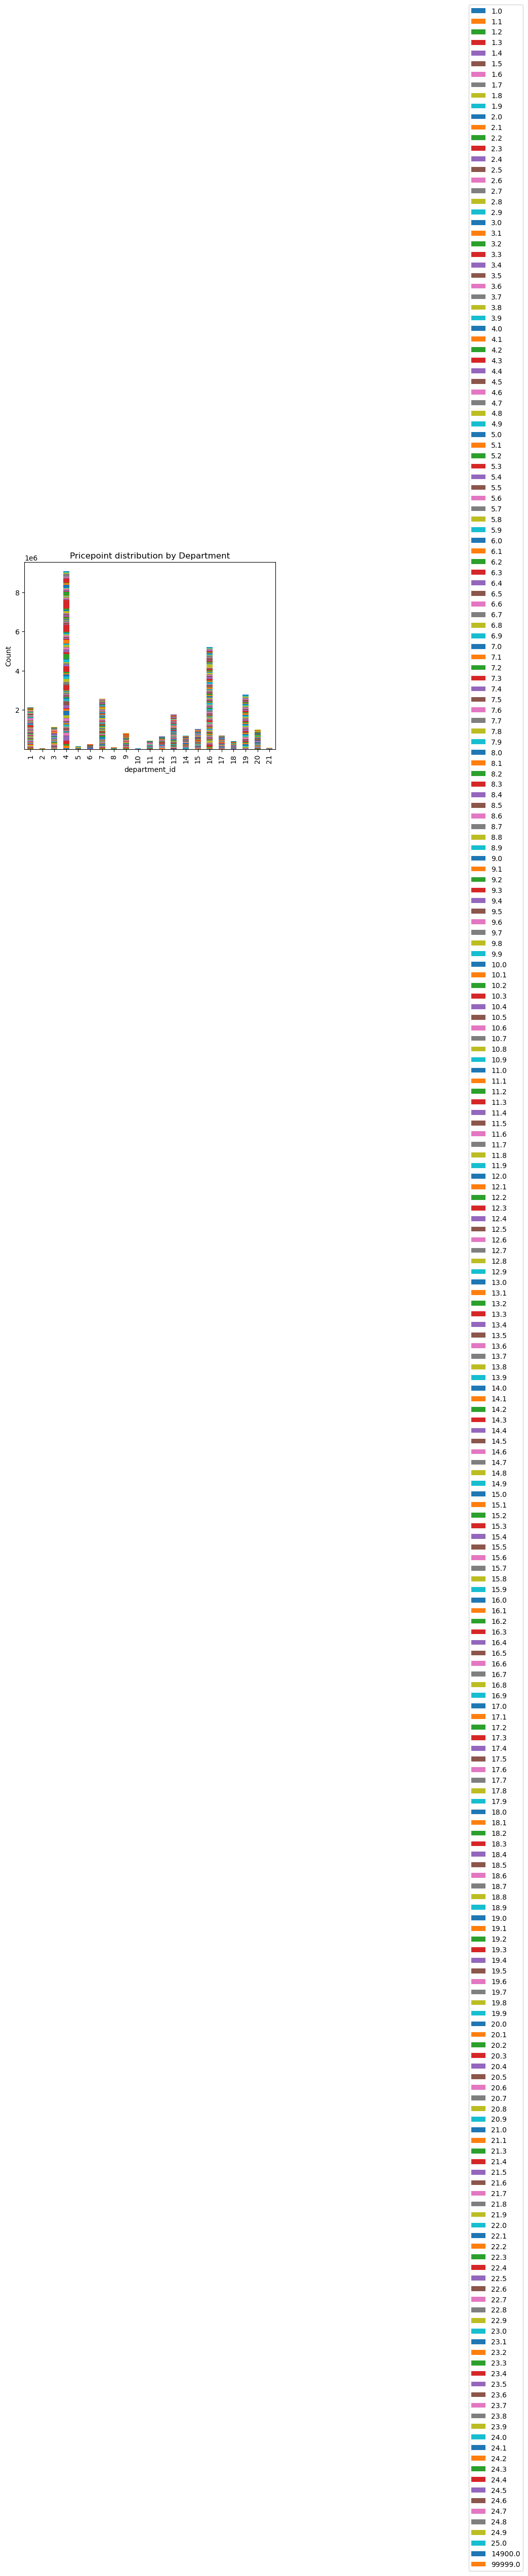

In [33]:
# Creating a clustered bar chart
plt.figure(figsize= (10, 12))
clustered_cross_tab_prices = cross_tab_prices.plot(kind='bar', stacked=True, title='Pricepoint distribution by Department')
plt.xlabel('department_id')
plt.ylabel('Count')
plt.legend(loc='upper right', bbox_to_anchor=(2, 4))

In [36]:
# Exporting clustered bar chart
clustered_cross_tab_prices.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'clustered_cross_tab_prices_dept.png',))

In [128]:
# Checking customer_profile by region
hh_by_region = pd.crosstab(normal_cust_merged['household_profile'],normal_cust_merged['region'], dropna = False)

In [129]:
hh_by_region

region,Midwest,Northeast,South,West
household_profile,,,,
Family-multiple kids,3370493,2566625,4859076,3749285
Family-single child,1721035,1290832,2371129,1834546
Single adult,1824487,1355828,2584352,1982365
Single parent,351692,256783,505905,368231


Text(0.5, 1.0, 'Household Profile Distribution by Region')

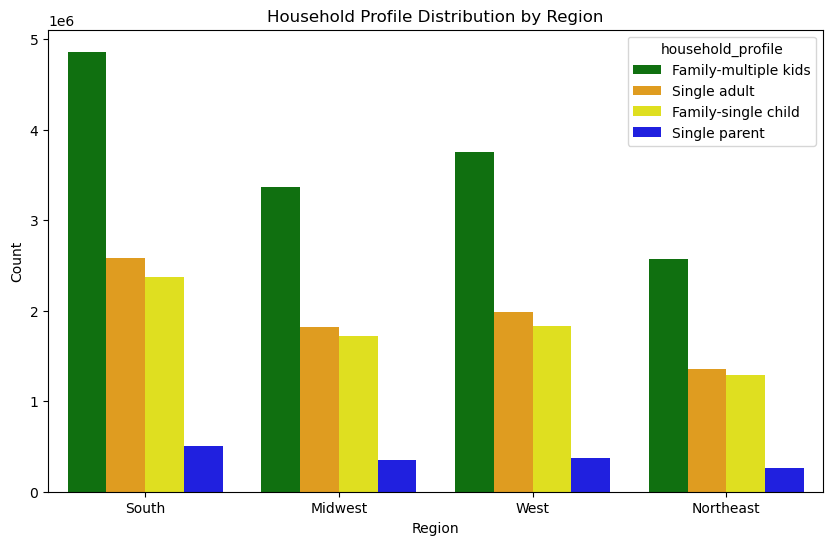

In [143]:
# Create a countplot to visualize the distribution of 'household_profile' in each 'region'
plt.figure(figsize=(10, 6))
countplot_hh_by_region = sns.countplot(x='region', hue='household_profile', data=normal_cust_merged, palette=['green', 'orange','yellow', 'blue'])
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Household Profile Distribution by Region')

In [144]:
# exporting Countplot bar chart
countplot_hh_by_region.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'countplot_hh_by_region.png'))

Text(0.5, 1.0, 'Customer Loyalty Distribution by Region')

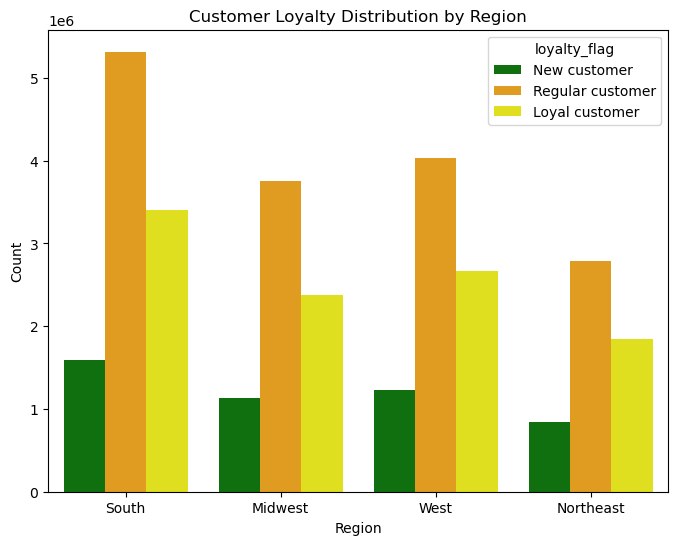

In [16]:
# Create a countplot to visualize the distribution of 'loyalty flag' in each 'region'
plt.figure(figsize=(8, 6))
countplot_loyalty_by_region = sns.countplot(x='region', hue='loyalty_flag', data=normal_cust_merged, palette=['green', 'orange','yellow'])
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Customer Loyalty Distribution by Region')

In [17]:
# exporting Countplot bar chart
countplot_loyalty_by_region.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'countplot_loyalty_by_region.png'))

In [145]:
# Export the df
normal_cust_merged.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'norml_cust_dept_merged.pkl'))